# Assumptions of Linear Regression
## 1)Linear Relationship between the features and target
## 2)Little or no Multicollinearity between the features:
## 3)Homoscedasticity Assumption
## 4)Normal distribution of error terms


In [1]:
# load the libraries and data to show linear relationship between independent and dependent variables
import pandas as pd
from patsy import dmatrices
from matplotlib import pyplot as plt
import numpy as np
df = pd.read_csv('C:\\Users\\MS066115\\Downloads\\training_ccpp_x_y_train.csv', header=0)

In [2]:
df.columns

Index(['# T', ' V', ' AP', ' RH', ' EP'], dtype='object')

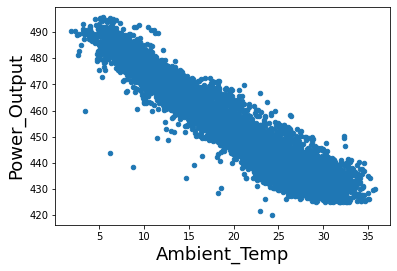

In [3]:
df.plot.scatter(x='# T', y=' EP')
plt.xlabel('Ambient_Temp', fontsize=18)
plt.ylabel('Power_Output', fontsize=18)
plt.show()


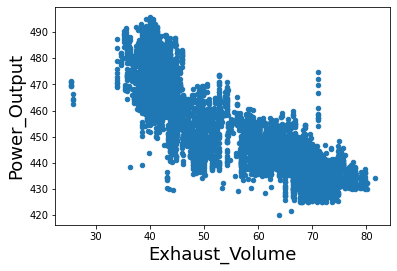

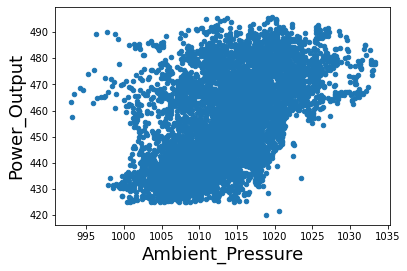

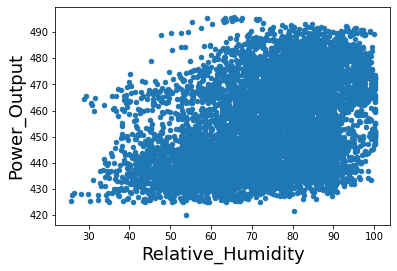

In [4]:
df.plot.scatter(x=' V', y=' EP')
plt.xlabel('Exhaust_Volume', fontsize=18)
plt.ylabel('Power_Output', fontsize=18)
plt.show()
df.plot.scatter(x=' AP', y=' EP')
plt.xlabel('Ambient_Pressure', fontsize=18)
plt.ylabel('Power_Output', fontsize=18)
plt.show()
df.plot.scatter(x=' RH', y=' EP')
plt.xlabel('Relative_Humidity', fontsize=18)
plt.ylabel('Power_Output', fontsize=18)
plt.show()

In [5]:
df.corr()[' EP']

# T   -0.948457
 V    -0.869620
 AP    0.519887
 RH    0.392988
 EP    1.000000
Name:  EP, dtype: float64

### 2) Little or no Multicollinearity between the features

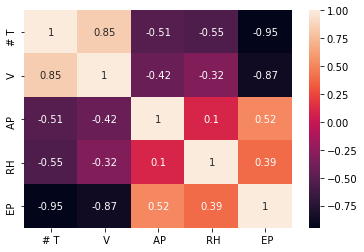

In [6]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

### 3)Homoscedasticity Assumption

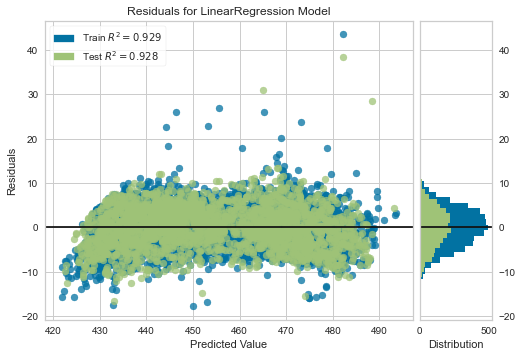

In [11]:
#Python code for residual plot for the given data set:
# make the dependent and independent variables
y=df[' EP']
x=df.loc[:,df.columns!=' EP']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LinearRegression

LR=LinearRegression()
visualizer=ResidualsPlot(LR)
visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)
visualizer.poof()

### 4.Normal distribution of error terms

<function matplotlib.pyplot.show(*args, **kw)>

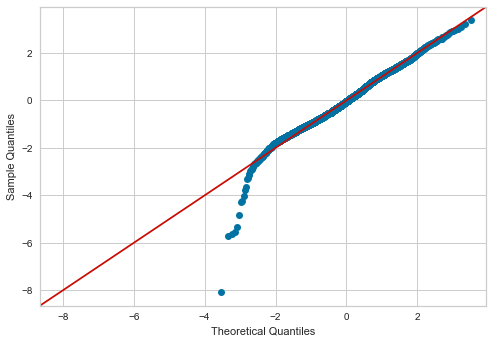

In [15]:
import statsmodels.api as sm
mod_fit =sm.OLS(y_train,X_train).fit()
res=mod_fit.resid
fig=sm.qqplot(res,fit=True,line='45')
plt.show


### 5.Little or No autocorrelation in the residuals

In [16]:
model= sm.OLS(y_train,X_train)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     EP   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          9.630e+06
Date:                Tue, 26 Jan 2021   Prob (F-statistic):                        0.00
Time:                        12:13:43   Log-Likelihood:                         -14631.
No. Observations:                4807   AIC:                                  2.927e+04
Df Residuals:                    4803   BIC:                                  2.930e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
# T           -1.6718      0.022    -75.957      0.000      -1.715      -1.629
 V            -0.2760      0.011    -24.158      0.000      -0.298      -0.254
 AP            0.5027      0.001    840.350      0.000       0.502       0.504
 RH           -0.0975      0.006    -15.387      0.000      -0.110      -0.085
==============================================================================
Omnibus:                      196.405   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              511.824
Skew:                          -0.190   Prob(JB):                    7.22e-112
Kurtosis:                       4.553   Cond. No.                         339.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
#Durbin_watson=2, shows no autocorrelation between the residuals